In [56]:
from tensorflow import keras
from keras.utils import to_categorical
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [57]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train , y_train),(x_test,y_test) = fashion_mnist.load_data()

In [58]:
label_name = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}


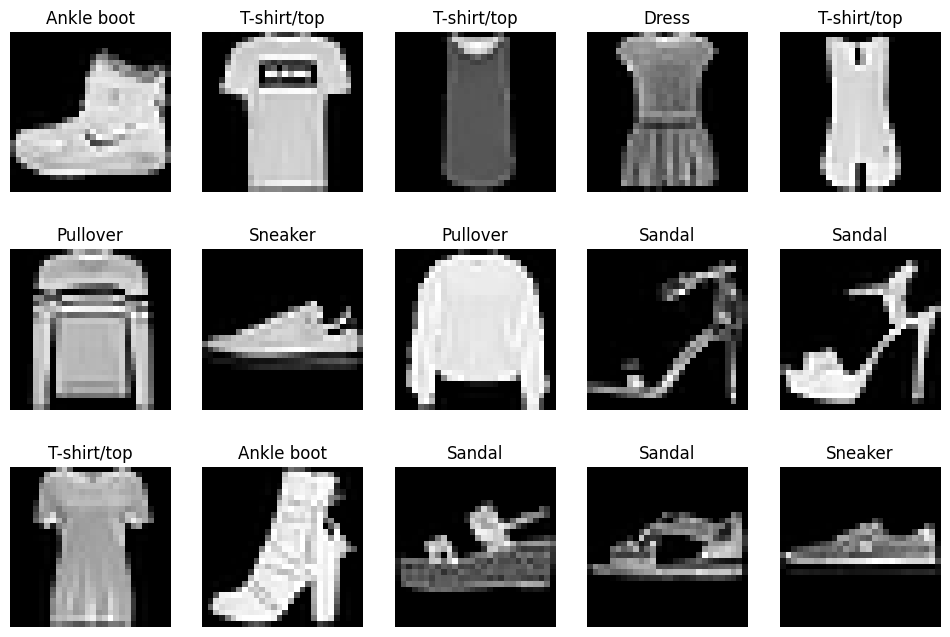

In [59]:
plt.figure(figsize=(12,8))
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.imshow(x_train[i] , cmap = "gray")
  plt.title(label_name[y_train[i]])
  plt.axis("off")

In [60]:
x_train/255.0 , x_test/255.0
y_train = to_categorical(y_train,num_classes = 10)
y_test = to_categorical(y_test , num_classes = 10)

In [61]:
print(x_train.shape , x_test.shape)
print(y_train.shape , y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 10) (10000, 10)


In [34]:
model = keras.models.Sequential([
    keras.layers.Conv2D(input_shape = (28,28,1) , kernel_size = (3,3) , padding = "same" , filters = 32 , activation="relu"),
    keras.layers.MaxPool2D((2,2)),

    keras.layers.Flatten(input_shape = (14 , 14 , 32)),
    keras.layers.Dense(1024 , activation="relu"),
    keras.layers.Dense(128 , activation="relu"  , kernel_regularizer=keras.regularizers.l2(l2 = 0.1)),
    keras.layers.Dense(10 , activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
print(model.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1024)                │       6,423,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,556,362 (25.01 MB)

 Trainable params: 6,556,362 (25.01 MB)

 Non-trainable params: 0 (0.00 B)

None


In [37]:
model.compile(loss = keras.losses.CategoricalCrossentropy() , optimizer = keras.optimizers.Adam(learning_rate = 0.001) , metrics= ["accuracy"])

In [38]:
history = model.fit(x_train , y_train , validation_data=(x_test , y_test) , batch_size = 32 , epochs = 20 , verbose = 2)

Epoch 1/20
1875/1875 - 11s - 6ms/step - accuracy: 0.8515 - loss: 3.9194 - val_accuracy: 0.8676 - val_loss: 0.7549
Epoch 2/20
1875/1875 - 8s - 4ms/step - accuracy: 0.8992 - loss: 0.4246 - val_accuracy: 0.8894 - val_loss: 0.3556
Epoch 3/20
1875/1875 - 10s - 5ms/step - accuracy: 0.9113 - loss: 0.2903 - val_accuracy: 0.8871 - val_loss: 0.3601
Epoch 4/20
1875/1875 - 7s - 4ms/step - accuracy: 0.9200 - loss: 0.2580 - val_accuracy: 0.8925 - val_loss: 0.3578
Epoch 5/20
1875/1875 - 10s - 5ms/step - accuracy: 0.9294 - loss: 0.2418 - val_accuracy: 0.8974 - val_loss: 0.3620
Epoch 6/20
1875/1875 - 11s - 6ms/step - accuracy: 0.9406 - loss: 0.2070 - val_accuracy: 0.8940 - val_loss: 0.4115
Epoch 7/20
1875/1875 - 7s - 4ms/step - accuracy: 0.9479 - loss: 0.1882 - val_accuracy: 0.9077 - val_loss: 0.3385
Epoch 8/20
1875/1875 - 8s - 4ms/step - accuracy: 0.9554 - loss: 0.1631 - val_accuracy: 0.8953 - val_loss: 0.4411
Epoch 9/20
1875/1875 - 11s - 6ms/step - accuracy: 0.9631 - loss: 0.1416 - val_accuracy: 0.90

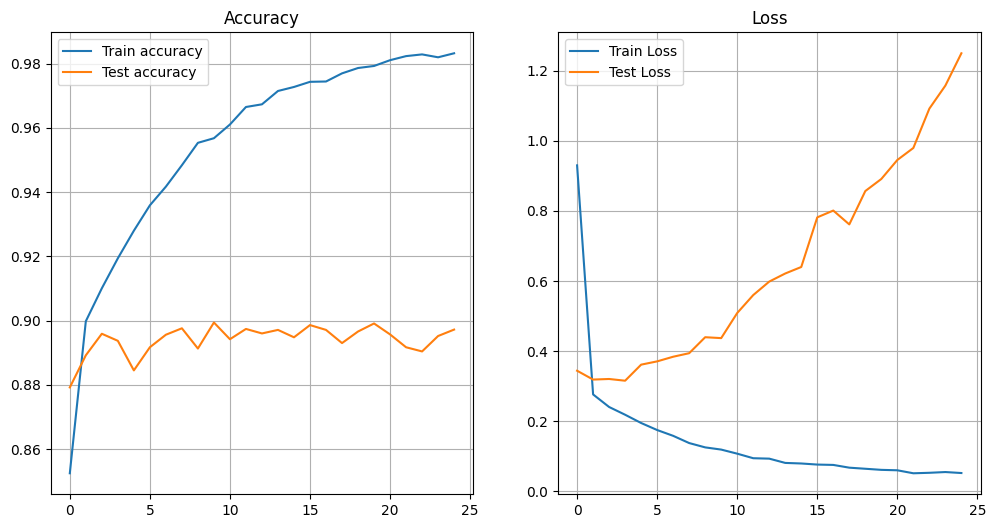

In [33]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"] , label = "Train accuracy" )
plt.plot(history.history["val_accuracy"] , label="Test accuracy")
plt.title("Accuracy")
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history["loss"] , label = "Train Loss")
plt.plot(history.history["val_loss"] , label = "Test Loss")
plt.title("Loss")
plt.legend()
plt.axis()
plt.grid()


In [62]:
model2 = keras.models.Sequential([
    keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), padding="same", filters=64, activation="relu"),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"),
    keras.layers.MaxPool2D((2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
print(model2.summary())

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 512)                 │       1,606,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,710,666 (6.53 MB)

 Trainable params: 1,710,666 (6.53 MB)

 Non-trainable params: 0 (0.00 B)

None


In [64]:
model2.compile(loss = keras.losses.CategoricalCrossentropy() , optimizer = keras.optimizers.Adam(learning_rate = 0.001) , metrics = ["accuracy"])


In [65]:
history2 = model2.fit(x_train , y_train ,validation_data=(x_test , y_test) , epochs = 20 , verbose = 2,batch_size=32 )

Epoch 1/20
1875/1875 - 12s - 6ms/step - accuracy: 0.8238 - loss: 1.2549 - val_accuracy: 0.8576 - val_loss: 0.5745
Epoch 2/20
1875/1875 - 17s - 9ms/step - accuracy: 0.8744 - loss: 0.4541 - val_accuracy: 0.8745 - val_loss: 0.4257
Epoch 3/20
1875/1875 - 8s - 4ms/step - accuracy: 0.8864 - loss: 0.3762 - val_accuracy: 0.8937 - val_loss: 0.3556
Epoch 4/20
1875/1875 - 10s - 5ms/step - accuracy: 0.8975 - loss: 0.3384 - val_accuracy: 0.8992 - val_loss: 0.3359
Epoch 5/20
1875/1875 - 7s - 4ms/step - accuracy: 0.9041 - loss: 0.3145 - val_accuracy: 0.8974 - val_loss: 0.3319
Epoch 6/20
1875/1875 - 7s - 4ms/step - accuracy: 0.9122 - loss: 0.2888 - val_accuracy: 0.9060 - val_loss: 0.3097
Epoch 7/20
1875/1875 - 6s - 3ms/step - accuracy: 0.9168 - loss: 0.2718 - val_accuracy: 0.9106 - val_loss: 0.3145
Epoch 8/20
1875/1875 - 11s - 6ms/step - accuracy: 0.9219 - loss: 0.2571 - val_accuracy: 0.9080 - val_loss: 0.2971
Epoch 9/20
1875/1875 - 7s - 4ms/step - accuracy: 0.9266 - loss: 0.2419 - val_accuracy: 0.908

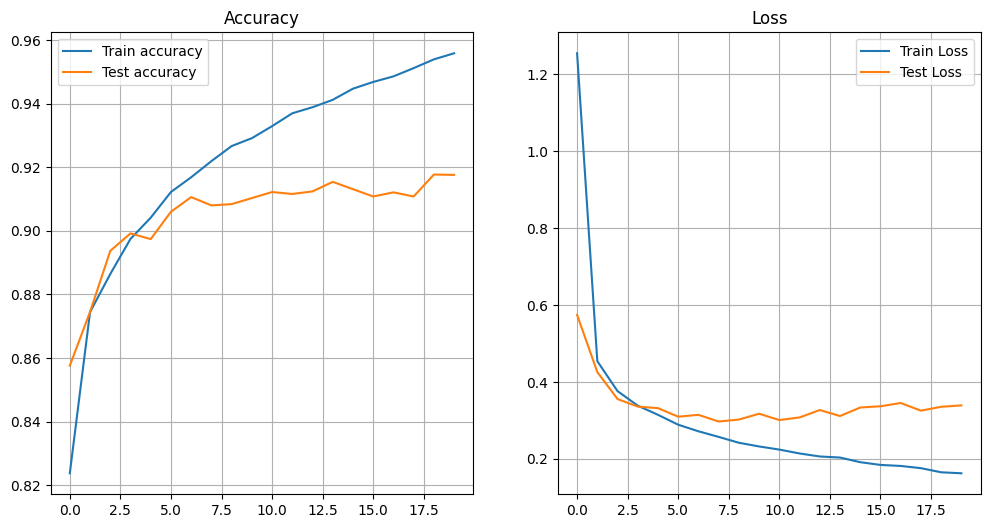

In [66]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.plot(history2.history["accuracy"] , label = "Train accuracy" )
plt.plot(history2.history["val_accuracy"] , label="Test accuracy")
plt.title("Accuracy")
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(history2.history["loss"] , label = "Train Loss")
plt.plot(history2.history["val_loss"] , label = "Test Loss")
plt.title("Loss")
plt.legend()
plt.axis()
plt.grid()

In [67]:
model2.evaluate(x_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9147 - loss: 0.3498


[0.33907175064086914, 0.9175999760627747]

In [68]:
predictions = model2.predict(x_test[:10])
predictions = np.argmax(predictions,axis = 1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


In [79]:
print(predictions)
print(np.argmax(y_test[:10],axis = 1))

[9 2 1 1 6 1 2 6 5 7]
[9 2 1 1 6 1 4 6 5 7]


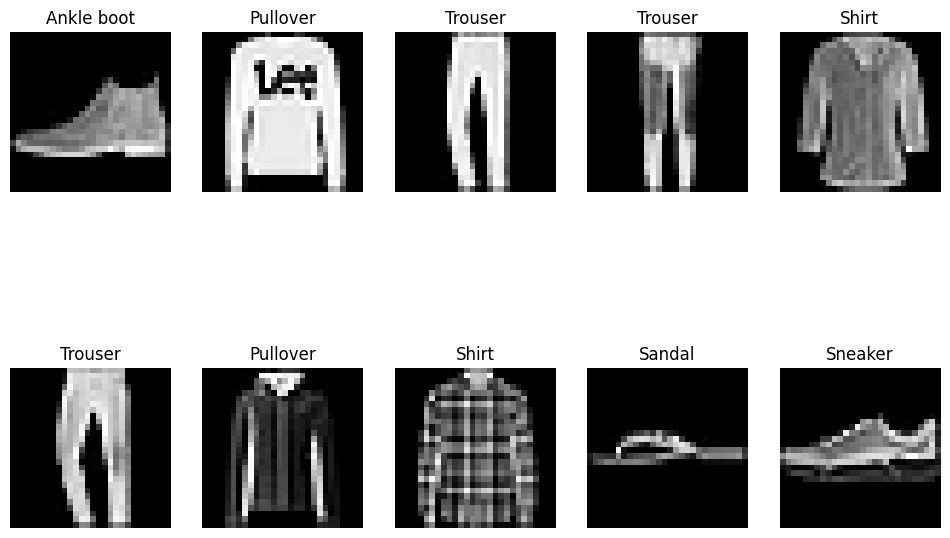

In [77]:
plt.figure(figsize=(12,8))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(x_test[i] , cmap = "gray")
  plt.title(label_name[predictions[i]])
  plt.axis("off")